In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from math import ceil
import numpy as np
import pickle
import pandas as pd

In [19]:
#fname = '528653157d4320141.pickle'
#fname = '528664172d33464026.pickle'
#fname = '528820438d371897.pickle'
#fname = '528910872d3934581.pickle'
fname = 'grb171004857.pickle'

In [20]:
def simple_exponential_smoothing(signal, α):
    
    output = [signal[0:20].mean()]
    estimate = signal[0:20].mean()
    
    for point in signal[1:]:
        estimate = α*(estimate) + (1-α)*point
        output.append(estimate)
    
    return output

In [9]:
def e_detector_cusum(data, lambda_vec):
    N = len(data)
    E = np.zeros((N, N))
    for j in range(N):
        for i in range(j, N):
            l = max(lambda_vec[i], np.mean(data[j:i]))
            if i == 0 and j == 0:
                E[j, i] = data[i] * np.log(l / lambda_vec[i]) - l + lambda_vec[i]
            else:
                E[j, i] = E[j, i - 1] + data[i] * np.log(l / lambda_vec[i]) - l + lambda_vec[i]
    
    return np.apply_along_axis(np.max, 0, E)

def e_detector_sr(data, lambda_vec):
    N = len(data)
    E = np.zeros((N, N))
    for j in range(N):
        for i in range(j, N):
            l = max(lambda_vec[i], np.mean(data[j:i]))
            if i == 0 and j == 0:
                E[j, i] = data[i] * np.log(l / lambda_vec[i]) - l + lambda_vec[i]
            else:
                E[j, i] = E[j, i - 1] + data[i] * np.log(l / lambda_vec[i]) - l + lambda_vec[i]
    
    return np.apply_along_axis(np.sum, 0, E)

/Users/aytijhyasaha/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aytijhyasaha/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/aytijhyasaha/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aytijhyasaha/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


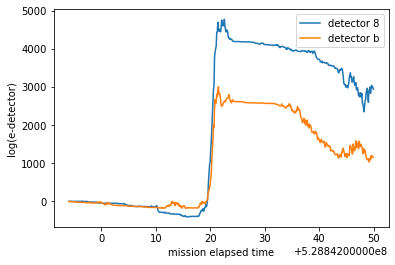

In [21]:
with open(f'{fname}', 'rb') as handle:
  d = pickle.load(handle)

data = pd.DataFrame(index=d[0][:-1])
data.index.rename("mission elapsed time", inplace=True)

times = pd.Series(data.index)

for key in d[1].keys():
  data[key] = d[1][key]

signal_1 = data.iloc[:, 1] #first detector, 50-300keV
signal_2 = data.iloc[:, 4] #second detector, 50-300keV

background_1 = simple_exponential_smoothing(signal_1.values, α=0.97)[:-40]
background_2 = simple_exponential_smoothing(signal_2.values, α=0.97)[:-40]

raw_data_1 = signal_1.values[40:]
raw_data_2 = signal_2.values[40:]

figs, axs = plt.subplots()

axs.plot(times[40:],e_detector_sr(raw_data_1,background_1), color="C0", label=f"detector {data.columns[1][1]}")
axs.plot(times[40:],e_detector_sr(raw_data_2,background_2), color="C1", label=f"detector {data.columns[4][1]}")
plt.ylabel("log(e-detector)")
plt.xlabel("mission elapsed time")
plt.legend()
plt.show()

In [26]:
data

,n8_r0,n8_r1,n8_r2,nb_r0,nb_r1,nb_r2
mission elapsed time,,,,,,
5.288420e+08,42,50,15,23,25,15
5.288420e+08,41,47,7,33,36,18
5.288420e+08,27,38,12,34,38,12
5.288420e+08,29,38,13,25,35,11
5.288420e+08,28,42,20,28,39,14
...,...,...,...,...,...,...
5.288420e+08,40,44,10,23,45,5
5.288420e+08,37,40,11,14,29,17
5.288420e+08,32,32,25,25,40,14
